In [92]:
import modin.pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
font = {'size'   : 18}

plt.matplotlib.rc('font', **font)

In [93]:
# trips = pd.read_csv("bigquery-citibike-trips.csv")
trips = pd.read_csv("fixed-citibike-trips.csv")

In [94]:
trips.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

In [95]:
trips

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,1069,2017-01-06 15:24:16,2017-01-06 15:42:06,266,Avenue D & E 8 St,40.723684,-73.975748,410,Suffolk St & Stanton St,40.720664,-73.985180,15545,Subscriber,1990.0,female
1,786,2017-01-25 13:37:45,2017-01-25 13:50:52,348,W Broadway & Spring St,40.724910,-74.001547,497,E 17 St & Broadway,40.737050,-73.990093,25661,Subscriber,1947.0,female
2,435,2017-01-09 13:05:52,2017-01-09 13:13:07,276,Duane St & Greenwich St,40.717488,-74.010455,303,Mercer St & Spring St,40.723627,-73.999496,24196,Subscriber,1989.0,female
3,315,2017-01-17 07:42:11,2017-01-17 07:47:26,485,W 37 St & 5 Ave,40.750380,-73.983390,472,E 32 St & Park Ave,40.745712,-73.981948,19768,Subscriber,1973.0,male
4,447,2017-01-30 18:48:07,2017-01-30 18:55:35,253,W 13 St & 5 Ave,40.735439,-73.994539,439,E 4 St & 2 Ave,40.726281,-73.989780,14929,Subscriber,1986.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957167,281,2018-04-05 10:31:05.918,2018-04-05 10:35:47.532,3140,1 Ave & E 78 St,40.771404,-73.953517,3369,E 82 St & East End Ave,40.772461,-73.946821,16302,Subscriber,1981.0,male
957168,189,2018-04-10 18:04:04.911,2018-04-10 18:07:14.602,3140,1 Ave & E 78 St,40.771404,-73.953517,3369,E 82 St & East End Ave,40.772461,-73.946821,29734,Subscriber,1987.0,male
957169,1285,2018-05-01 16:59:30.243,2018-05-01 17:20:55.541,3369,E 82 St & East End Ave,40.772461,-73.946821,3369,E 82 St & East End Ave,40.772461,-73.946821,29847,Subscriber,1959.0,female
957170,1616,2018-05-23 18:49:25.785,2018-05-23 19:16:22.177,3369,E 82 St & East End Ave,40.772461,-73.946821,3369,E 82 St & East End Ave,40.772461,-73.946821,29932,Subscriber,1969.0,unknown


In [96]:
trips.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
count,9.571720e+05,957172.000000,957172.000000,957172.000000,957172.000000,957172.000000,957172.000000,957172.000000,858855.00000
mean,9.617450e+02,969.144711,40.736302,-73.987084,959.770266,40.735965,-73.987285,21299.670925,1977.47277
std,1.265243e+04,1135.822265,0.048351,0.077279,1129.015253,0.048286,0.077287,4916.093413,11.69363
min,6.000000e+01,72.000000,0.000000,-74.025353,72.000000,0.000000,-74.055701,14529.000000,1874.00000
25%,3.800000e+02,329.000000,40.720196,-73.998102,328.000000,40.720196,-73.998522,17322.000000,1969.00000
50%,6.240000e+02,453.000000,40.737050,-73.989111,453.000000,40.737050,-73.989186,20057.000000,1980.00000
75%,1.058000e+03,529.000000,40.752069,-73.977987,528.000000,40.751873,-73.978059,25093.250000,1987.00000
max,5.621413e+06,3686.000000,40.814394,0.000000,3686.000000,40.814394,0.000000,33690.000000,2002.00000


In [97]:
trips.gender.unique()

array(['female', 'male', 'unknown'], dtype=object)

In [111]:
len(trips.bikeid.unique())

17387

In [113]:
trips.starttime.min()

Timestamp('2013-07-01 00:02:16')

In [114]:
trips.starttime.max()

Timestamp('2018-05-31 23:57:01.982000')

<Axes: xlabel='birth_year', ylabel='Count'>

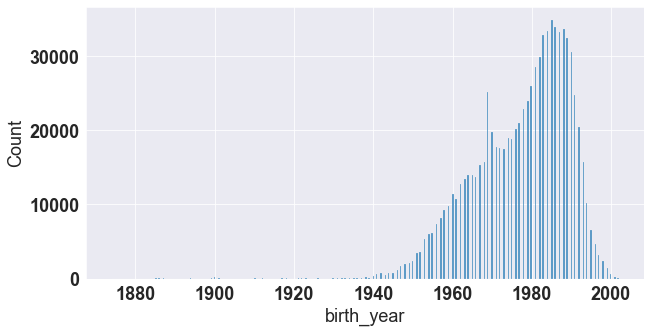

In [98]:
sns.histplot(data=trips, x='birth_year')

In [99]:
# remove noise
trips = trips[trips['birth_year'] >= 1940]

In [100]:
trips['usertype'].unique()

array(['Subscriber', nan, 'Customer'], dtype=object)

<Axes: xlabel='tripduration', ylabel='Proportion'>

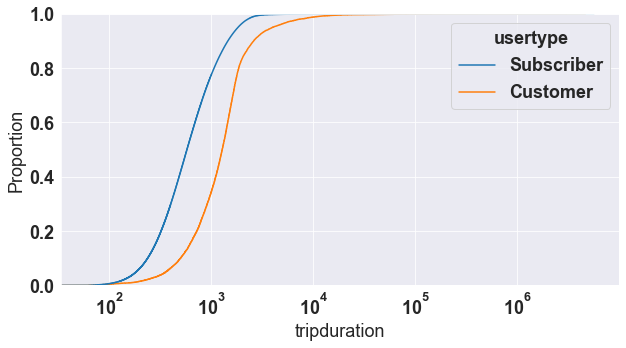

In [101]:
sns.ecdfplot(data=trips, x='tripduration', log_scale=True, hue="usertype")

<Axes: xlabel='tripduration', ylabel='Proportion'>

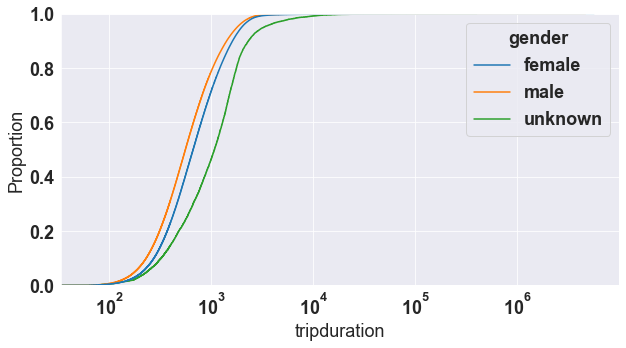

In [102]:
sns.ecdfplot(data=trips, x='tripduration', log_scale=True, hue="gender")

Number of bikes: 17387


<Axes: ylabel='Proportion'>

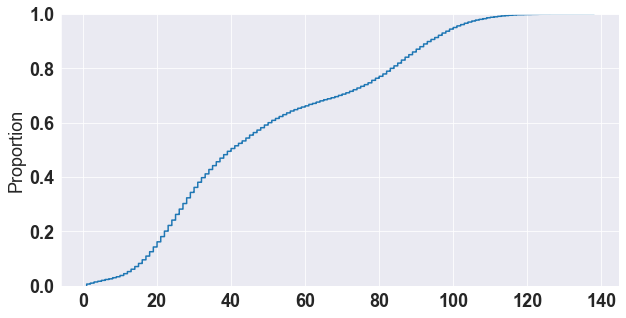

In [103]:
print(f"Number of bikes: {len(trips['bikeid'].unique())}")
sns.ecdfplot(x=trips['bikeid'].value_counts().array)

In [104]:
# trips['starttime']
trips['starttime'] =  pd.to_datetime(trips['starttime'])
trips['trip_month'] = trips['starttime'].dt.to_period('M')
trips['trip_month'] = trips['trip_month'].apply(lambda t: t.to_timestamp())


In [105]:
trips_by_month = trips.groupby(['trip_month']).size().reset_index(name
    = 'count').reset_index()


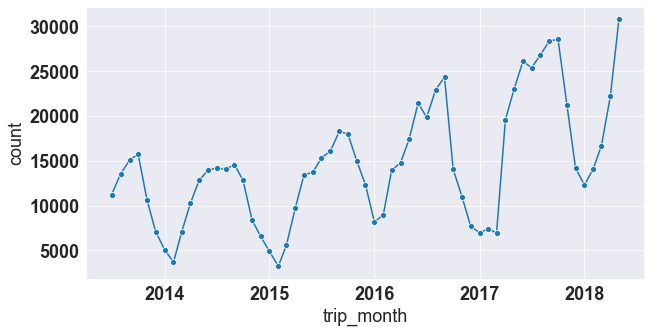

In [106]:
ax = sns.lineplot(data=trips_by_month, x='trip_month', y='count', markers=True, marker="o") 

In [107]:
trips['starttime'] =  pd.to_datetime(trips['starttime'])
trips['trip_hour'] = trips['starttime'].dt.hour
# trips['trip_hour'] = trips['trip_hour'].apply(lambda t: t.to_timestamp())
trips['trip_day_of_week'] = trips['starttime'].dt.dayofweek

trips_by_hour = trips.groupby(['trip_hour', 'trip_day_of_week']).size().reset_index(name
    = 'count').reset_index()


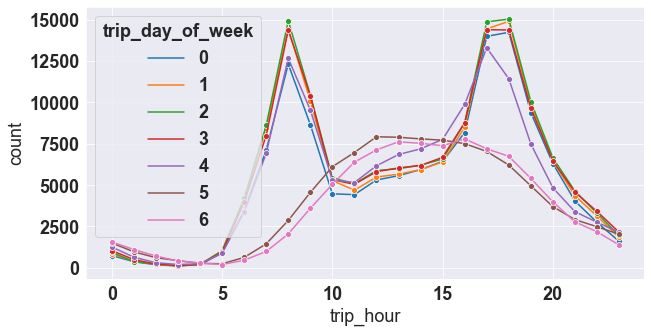

In [108]:
sns.set_palette("tab10")
ax = sns.lineplot(data=trips_by_hour, x='trip_hour', y='count', hue='trip_day_of_week', markers=True, marker="o", palette=sns.color_palette()) 